## KNN ALGORITHM FOR ECG CLASSIFICATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")
print("lib imported")


lib imported


In [31]:
df=pd.read_csv("D:\\Zaids Work\\Signal processing with AI\\new data\\ecg.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [35]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1:]

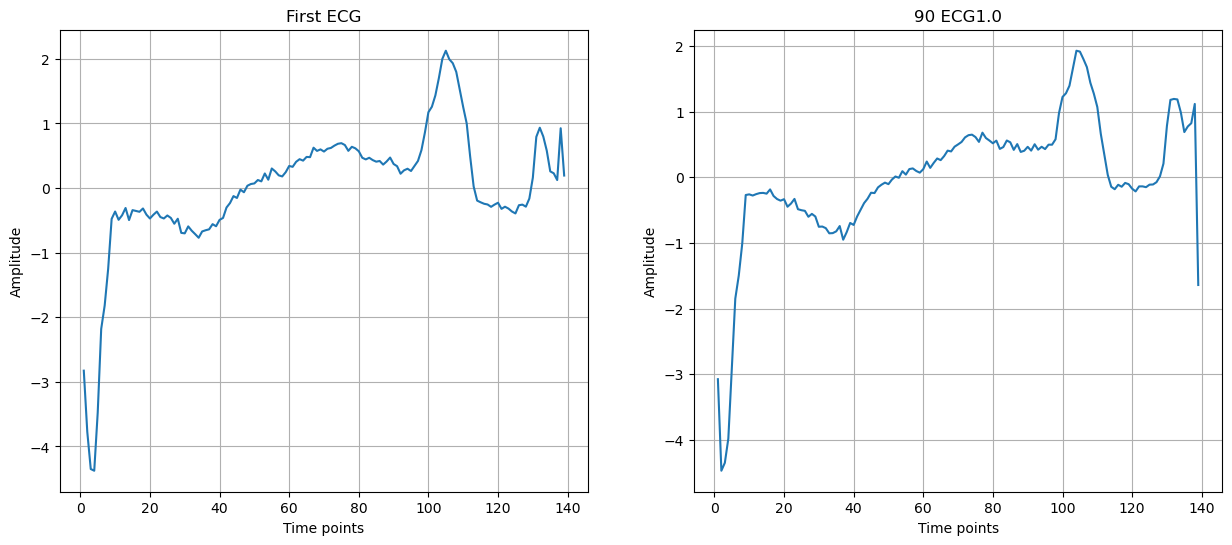

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(x.iloc[0,:])
plt.title("First ECG")
plt.xlabel("Time points")
plt.ylabel("Amplitude")
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(x.iloc[90,:])
plt.title("90 ECG"+str(y.iloc[90,0]))
plt.xlabel("Time points")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [38]:
df.iloc[:,-1:].value_counts()

140
1.0    2919
0.0    2079
Name: count, dtype: int64

In [39]:
df.isnull().sum()
print("no missing values")



no missing values


In [48]:
std=StandardScaler()
x.iloc[:,:]=std.fit_transform(x)

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=23)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3748, 139)
(1250, 139)
(3748, 1)
(1250, 1)


In [56]:
KNN=KNeighborsClassifier(n_neighbors=5,p=2)
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [57]:
ypredict=KNN.predict(xtest)
xtest

,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,139
4400,0.667369,0.921749,1.073478,0.923167,0.764776,0.487535,0.442786,0.383197,0.111244,-0.383991,...,1.413753,0.796948,0.480348,0.373509,0.397170,0.427234,0.047006,-0.883293,-1.367120,-1.903259
1738,0.505589,-0.062963,-0.623850,-1.093565,-0.956108,-0.257296,0.178715,-0.247594,0.228492,0.341158,...,0.992232,0.773129,0.897560,0.970916,0.950746,0.915684,0.905720,1.133465,1.012800,0.280247
3397,-0.360917,0.098334,0.325138,0.370246,0.553263,0.648598,0.609831,-0.002280,-0.704860,-0.847980,...,-0.775590,-1.000911,-1.093662,-0.847125,-0.729298,-1.039049,-1.314329,-1.577243,-1.629275,-0.714256
2911,1.480053,0.699977,0.206994,-0.856094,-1.321262,-0.976718,-0.032883,-0.342734,0.081165,1.040093,...,-0.310520,0.162288,0.591022,0.760432,1.102130,1.370915,1.528022,1.158132,0.832287,1.642065
3493,-0.896467,-0.552024,-0.110896,0.016700,0.053984,0.115050,0.343173,0.243432,-0.302659,-0.440262,...,1.115842,0.986900,0.687227,0.316921,0.076960,-0.227927,-0.835546,-1.458832,-1.563685,-1.235315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,-1.373548,-1.218231,-0.928116,-0.385629,0.473258,0.539429,0.435819,1.059260,0.750697,0.318461,...,0.298609,0.792532,0.827416,0.686438,0.664609,0.544926,0.575291,0.511218,0.941306,0.438068
3140,0.233895,0.875787,1.216495,1.320703,1.063939,0.287686,-0.290093,-0.743612,-1.093032,-1.136105,...,-2.393473,-2.330356,-2.253691,-1.892628,-1.402656,-0.968487,-0.503134,-0.368206,-0.502406,0.363103
4833,0.906552,0.289939,-0.010097,-0.242174,-0.532505,-0.918410,-0.754489,-0.054003,-0.033241,-0.476179,...,-0.549442,-0.582271,-0.750653,-0.784835,-0.927834,-1.336884,-1.461265,-1.247417,-0.475404,0.200637
2520,-0.194593,-0.704690,-0.983360,-0.836420,-0.434664,0.291207,0.519759,0.205792,0.550113,0.463125,...,0.872307,0.854907,0.837741,0.869046,0.839063,0.956810,1.285276,1.261528,0.668127,-0.415682


In [58]:
ytest

,140
4400,0.0
1738,1.0
3397,0.0
2911,1.0
3493,0.0
...,...
1900,1.0
3140,0.0
4833,0.0
2520,1.0


In [59]:
cm=confusion_matrix(ytest,ypredict)
cm

array([[492,   9],
       [  5, 744]])

In [60]:
accuracy=accuracy_score(ytest,ypredict)
accuracy

0.9888